In [1]:
import mlx.core as mx
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [39]:
# def log_target_distribution(theta):
#     x, y = theta
#     a, b = 1, 200
#     return -(mx.log((a - x)**2 + b * (y - x**2)**2))

def log_target_distribution(theta):
    x, y = theta
    return mx.sum(-0.5 * ((x - 0.5)**2 + (y - 1.5)**2))

def potential(theta, grad=False):
    if grad:
        return -mx.grad(log_target_distribution)(theta)
    return -log_target_distribution(theta)

diagonal_mass = mx.array([50., 50.])
inverse_mass_matrix = mx.diag(1/diagonal_mass)

def kinetic(momenta, inverse_mass_matrix):
    return 0.5 * momenta @ inverse_mass_matrix @ momenta


def hamiltonian(theta, momenta, inverse_mass_matrix):
    return potential(theta) + kinetic(momenta, inverse_mass_matrix)

def sample_momenta(diagonal_mass):
    return mx.array([mx.random.normal(scale=mi.tolist()**0.5) for mi in diagonal_mass])

def sample_theta(a, b):
    return mx.random.uniform(a, b, shape=a.shape)

def generate_new_step_traj(min_step=None, max_step=None, min_traj=None, max_traj=None):
    if min_step is None:
        min_step = mx.random.uniform(0.01, 0.07)
    else:
        min_step = min_step
    if max_step is None:
        max_step = mx.random.uniform(0.07, 0.18)
    else:
        max_step = max_step
    if max_traj is None:
        max_traj = mx.random.uniform(18, 25)
    else:
        max_traj = max_traj
    if min_traj is None:
        min_traj = mx.random.uniform(1, 18)
    else:
        min_traj = min_traj

    step_size = mx.random.uniform(min_step, max_step)
    traj_size = int(mx.random.uniform(min_traj, max_traj).tolist())
    return step_size, traj_size

def leapfrog(theta_init, momenta_init, diagonal_mass):
    step_size, traj_size = generate_new_step_traj()
    momenta = momenta_init - 0.5 * step_size * potential(theta_init, grad=True)
    theta = theta_init + step_size * momenta / diagonal_mass
    for _ in range(traj_size - 1):
        momenta = momenta - 0.5 * step_size * potential(theta, grad=True)
        theta = theta + step_size * momenta / diagonal_mass
    momenta = momenta - 0.5 * step_size * potential(theta, grad=True)
    return theta, momenta

def acceptance_probability(theta, theta_proposed, momenta, momenta_proposed):
    H_proposed = hamiltonian(theta_proposed, momenta_proposed, inverse_mass_matrix)
    H_current = hamiltonian(theta, momenta, inverse_mass_matrix)
    return mx.minimum(1., mx.exp(-H_proposed) / mx.exp(-H_current))

def single_step(state):
    momenta = sample_momenta(diagonal_mass)
    state_proposed, momenta_proposed = leapfrog(state, momenta, diagonal_mass)
    prob = acceptance_probability(state, state_proposed, momenta, momenta_proposed)
    rand = mx.random.uniform()
    new_state = mx.where(
            prob > rand,
            state_proposed,
            state,
        )
    return new_state

theta_init = sample_theta(mx.array([-5., -5.]), -1.)


chains = []
state = single_step(theta_init)
for _ in tqdm(range(1000)):
    chains.append(state)
    state = single_step(state)
chains.append(state)



100%|██████████| 1000/1000 [00:03<00:00, 284.20it/s]


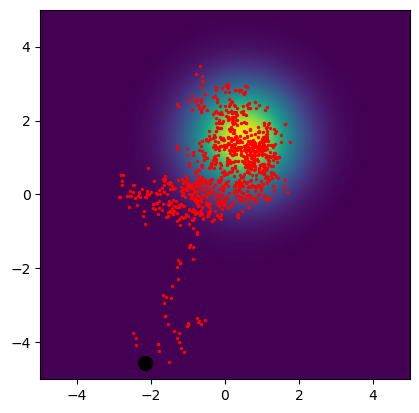

In [41]:
# def log_target_distribution2(theta):
#     x, y = theta
#     a, b = 1, 200
#     return -(np.log((a - x)**2 + b * (y - x**2)**2))

def log_target_distribution2(theta):
    x, y = theta
    return np.exp(np.sum(-0.5 * ((x - 0.5)**2 + (y - 1.5)**2)))

x_arr = np.linspace(-5, 5, 500)
y_arr = np.linspace(-5, 5, 500)
X, Y = np.meshgrid(x_arr, y_arr)
Z = np.zeros((len(x_arr), len(y_arr)))
for i in range(len(x_arr)):
    for j in range(len(y_arr)):
        Z[i,j] = log_target_distribution2((X[i,j], Y[i,j]))

# Plotting with imshow
plt.imshow(Z, extent=[x_arr.min(), x_arr.max(), y_arr.min(), y_arr.max()], origin='lower')

# Assuming 'chains' variable is defined elsewhere in your code, plotting the scatter on top
thetas = np.array(chains)  # Ensure 'chains' is defined and contains your data
plt.scatter(thetas[:,0], thetas[:,1], s=2, c="red")
plt.scatter(thetas[0,0], thetas[0,1], s=100, c="black")

# Display the plot
plt.show()

In [26]:
chains

[array([-15.3134, -10.2644], dtype=float32),
 array([-15.3134, -10.2644], dtype=float32),
 array([-15.3134, -10.2644], dtype=float32),
 array([-15.3134, -10.2644], dtype=float32),
 array([-15.3134, -10.2644], dtype=float32),
 array([-15.3134, -10.2644], dtype=float32),
 array([-15.3134, -10.2644], dtype=float32),
 array([-15.3134, -10.2644], dtype=float32),
 array([-15.3134, -10.2644], dtype=float32),
 array([-15.3134, -10.2644], dtype=float32),
 array([-15.3134, -10.2644], dtype=float32),
 array([-15.3134, -10.2644], dtype=float32),
 array([-15.3134, -10.2644], dtype=float32),
 array([-15.3134, -10.2644], dtype=float32),
 array([-15.3134, -10.2644], dtype=float32),
 array([-15.3134, -10.2644], dtype=float32),
 array([-15.3134, -10.2644], dtype=float32),
 array([-15.3134, -10.2644], dtype=float32),
 array([-15.3134, -10.2644], dtype=float32),
 array([-15.3134, -10.2644], dtype=float32),
 array([-15.3134, -10.2644], dtype=float32),
 array([-15.3134, -10.2644], dtype=float32),
 array([-1